In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

#import pysal as ps # Wczytanie danych z pliku dbf

In [2]:
# Aleknsadra Kowalczyk 307414

## Klasyfikacja

Klasyfikacja zalicza się do metod uczenia nadzorowanego (ang. supervised learning). Zbiór (macierz) danych w tym przypadku składa się z obiektów charakteryzujących się atrybutami opisującymi i atrybutem decyzyjnym. Przyjmuje się przy tym, że pomiędzy atrybutami opisującymi, a atrybutem decyzyjnym zachodzi pewien związek przyczynowo-skutkowy zaś kategoryczny atrybut decyzyjny określa klasę do której przynależy obiekt. Zbiór danych jest traktowany jako źródło wiedzy na podstawie którego określa się rodzaj klasyfikatora, a następnie dobiera jego parametry w tzw. procesie uczenia. Gotowy klasyfikator może następnie zostać wykorzystany do określenia przynależności obiektu dla którego znane są jedynie wartości atrybutów opisujących do właściwej klasy. 

Z reguły w celu sprawdzenia poprawności danego algorytmu i sprawdzenia jego skuteczności dla danego zadania klasyfikacji podział zbioru danych wykonywany jest na zbiór uczący i testowy (najczęściej w proporcjach 80/20 lub 70/30). Czasem jednak w przypadku testowania algorytmów i ich dostrajania stosuje się podział 60/20/20, a poszczególne części stanową zbiory odpowiednio: treningowy, walidacyjny i testowy. 

W rozdziale tym skupimy się na następujących klasyfikacji SVM


Na końcu zaprezentowane zostaną metody łączenia wyników różnych klasyfikatorów (tzw. ensemblingu), w celu poprawy jakości klasyfikacji.


Wygenerujemy teraz nowy zbiór z klastrami bardziej się nakładającymi

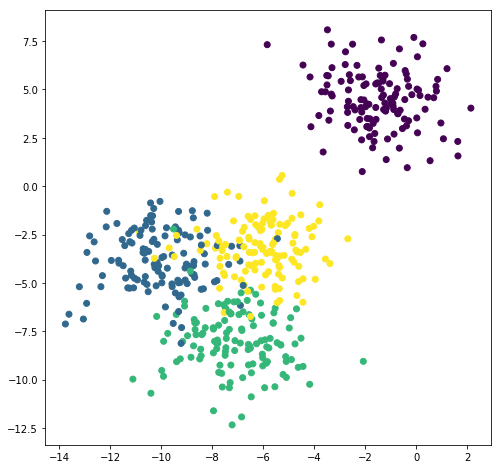

In [2]:
from sklearn.datasets import make_blobs
X3, y3 = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1.5,
                  center_box=(-10.0, 10.0),
                  shuffle=True,    # przetasowanie kolejności próbek
                  random_state=1)  # ustawienie momentu startu zmiennej pseudolosowej w celu zapewnienia powtarzalności wyników
columns = ['feature' + str(x) for x in np.arange(1, X3.shape[1]+1, 1)]
d = {key: values for key, values in zip(columns, X3.T)}
d['label'] = y3
dane3 = pd.DataFrame(d).reindex(columns=columns+['label'])

#Wyświelenie blobów
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter(dane3.feature1, dane3.feature2, marker='o', c=dane3.label)

Miara $f_1 = 2*\frac{precyzja * czułość}{precyzja+czułość}$. 

Precyzja jest miarą wskazującą z jaką pewnością możemy ufać przewidywaniom pozytywnym: $precyzja = \frac{TP}{TP+FP}$  

Czułość jest miarą wskazującą w jakim procencie klasa faktycznie pozytywna została pokryta przewidywaniem pozytywnym: $czułość = \frac{TP}{TP+FN}$ 


### 2.4 SVM
Metoda wektorów nośnych/SVM z ang. Support Vector Machine jest algorytmem, którego zadaniem jest podzielenie przestrzeni cech przy pomocy wektorów nośnych. W przypadku 2 cech, które można zobrazować na wykresie płaskim, jest są to po proste (w przypadku jądra liniowego) lub wielomiany lub funkcja Gaussa (w przypadku jąder nieliniowych). Jądra liniowe są szybkie i proste w użyciu, jednakże nadają się do klasyfikacji obszarów wyraźnie od siebie odstających. W celu dokładnego wyodrębnienia obszarów należy użyć jąder nieliniowych, uważając na przeuczenie klasyfikatora.   

,feature1,feature2,label
0,-10.785289,1.728062,1
1,-6.342566,9.911338,0
2,-14.431693,-3.683509,1
3,10.389289,-6.023495,0
4,-4.118290,-5.106990,1
...,...,...,...
495,-13.098551,-3.460073,1
496,-3.288403,-10.189205,1
497,-10.095709,-7.254112,1
498,-6.396800,8.117403,0


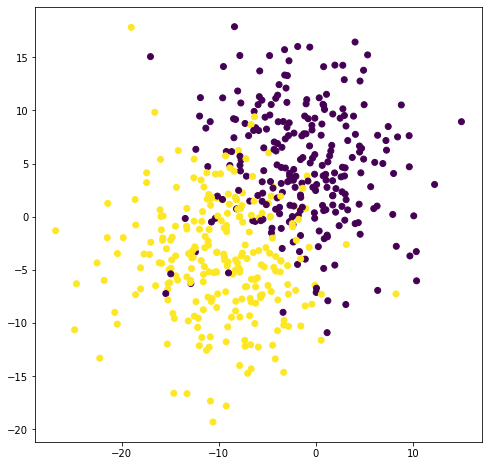

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
X3, y3 = make_blobs(n_samples=500,
                  n_features=2,
                  centers=2,
                  cluster_std=5.5,
                  center_box=(-10.0, 10.0),
                  shuffle=True,    # przetasowanie kolejności próbek
                  random_state=1)  # ustawienie momentu startu zmiennej pseudolosowej w celu zapewnienia powtarzalności wyników
columns = ['feature' + str(x) for x in np.arange(1, X3.shape[1]+1, 1)]
d = {key: values for key, values in zip(columns, X3.T)}
d['label'] = y3
dane3 = pd.DataFrame(d).reindex(columns=columns+['label'])

#Wyświelenie blobów
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter(dane3.feature1, dane3.feature2, marker='o', c=dane3.label)

dane3

C:\Users\KIGEIT\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


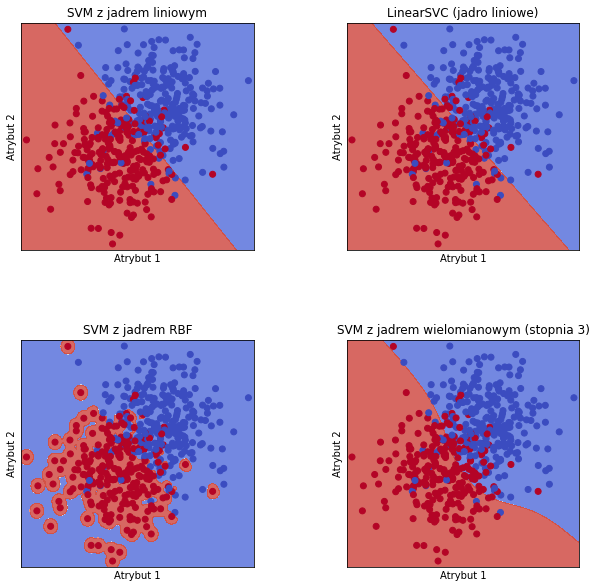

In [13]:
from sklearn import svm
h = .02  # step size in the mesh
cechy = columns
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(dane3[cechy], dane3['label'])
rbf_svc = svm.SVC(kernel='rbf', gamma=2).fit(dane3[cechy], dane3['label'])
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(dane3[cechy], dane3['label'])
lin_svc = svm.LinearSVC(C=C).fit(dane3[cechy], dane3['label'])

# create a mesh to plot in
x_min, x_max = dane3.iloc[:, 0].min() - 1, dane3.iloc[:, 0].max() + 1
y_min, y_max = dane3.iloc[:, 1].min() - 1, dane3.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVM z jadrem liniowym',
          'LinearSVC (jadro liniowe)',
          'SVM z jadrem RBF',
          'SVM z jadrem wielomianowym (stopnia 3)']

plt.figure(figsize=(10,10))
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(dane3.iloc[:, 0], dane3.iloc[:, 1], c=dane3.label, cmap=plt.cm.coolwarm)
    plt.xlabel('Atrybut 1')
    plt.ylabel('Atrybut 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

## Liniowe SVM

W pakiecie sklearn dostępne są dwa linowe modele svm.SVC i svm.LinearSVC.

### Zadanie 1

Dla klasyfikatorów liniowego svm.SVC przeprowadź testy doboru współczynnika regularyzacji C dla wartości [0.01, 0.1, 1, 10, 100, 1000]. Pokaż granice decyzyjne oraz wykreśl krzywe ROC. Na podstawie otrzymanych wyników określ najlepszą wartość współczynnika C.

In [4]:
# przede wszytskim zaczynam od podziału zbioru na zbiór treningowy i testowy

In [5]:
cechy = columns
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dane3[cechy], dane3['label'], test_size=0.2, random_state=0)

In [6]:
# tworzę modele svc dla różnych wartości parametru

from sklearn import svm
h = .02  # step size in the mesh
cechy = columns
C = [0.01, 0.1, 1, 10, 100, 1000]  # SVM regularization parameter
svc = [0] * 6

for i in range(6):
    parametr = C[i]
    svc[i] = svm.SVC(kernel='linear', C=parametr).fit(X_train, y_train)

print(svc)

[SVC(C=0.01, kernel='linear'), SVC(C=0.1, kernel='linear'), SVC(C=1, kernel='linear'), SVC(C=10, kernel='linear'), SVC(C=100, kernel='linear'), SVC(C=1000, kernel='linear')]


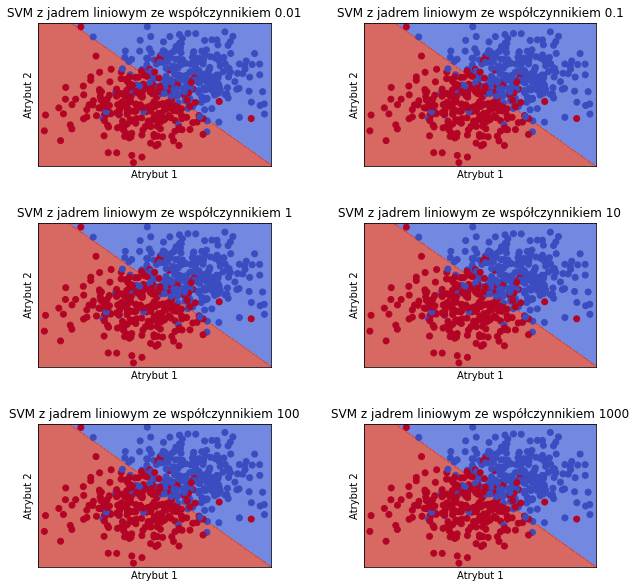

In [7]:
from sklearn import svm
h = .02  # step size in the mesh
cechy = columns


# create a mesh to plot in
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


titles = ['SVM z jadrem liniowym ze współczynnikiem 0.01', 'SVM z jadrem liniowym ze współczynnikiem 0.1', 'SVM z jadrem liniowym ze współczynnikiem 1', 'SVM z jadrem liniowym ze współczynnikiem 10', 'SVM z jadrem liniowym ze współczynnikiem 100', 'SVM z jadrem liniowym ze współczynnikiem 1000']

plt.figure(figsize=(10,10))

    
for i in range(6):

    plt.subplot(3, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = svc[i].predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(dane3.iloc[:, 0], dane3.iloc[:, 1], c=dane3.label, cmap=plt.cm.coolwarm)
    plt.xlabel('Atrybut 1')
    plt.ylabel('Atrybut 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    

plt.show()

In [10]:
from sklearn.metrics import plot_roc_curve, roc_curve, auc

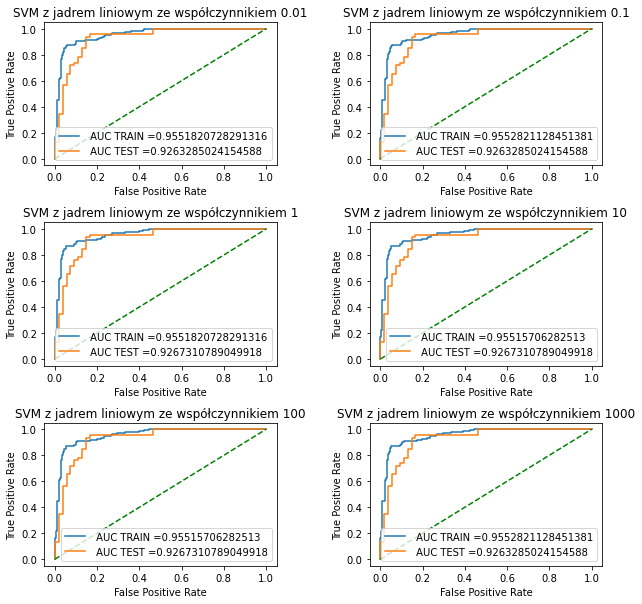

In [17]:
titles = ['SVM z jadrem liniowym ze współczynnikiem 0.01', 'SVM z jadrem liniowym ze współczynnikiem 0.1', 'SVM z jadrem liniowym ze współczynnikiem 1', 'SVM z jadrem liniowym ze współczynnikiem 10', 'SVM z jadrem liniowym ze współczynnikiem 100', 'SVM z jadrem liniowym ze współczynnikiem 1000']
plt.figure(figsize=(10,10))
 
for i in range(6):

    y_train_pred =svc[i].decision_function(X_train)    
    y_test_pred =svc[i].decision_function(X_test)

    plt.subplot(3, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

    plt.grid()

    plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
    plt.plot([0,1],[0,1],'g--')
    plt.legend()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("AUC(ROC curve)")
    plt.grid(color='black', linestyle='-', linewidth=0.5)
    plt.title(titles[i])
    
    
plt.show()




In [ ]:
# WNIOSKI
# widzimy, że dla każdego z testowanych przez nas wartości współczynnika C otrzymaliśmy niemal identyczne wyniki.
#  dlatego nie można wskazać jednego najelpszego, każdy daje nam praktycznie ten sam wynik 

### Zadanie 2

Dla klasyfikatorów liniowego svm.LinearSVC przeprowadź testy doboru współczynnika regularyzacji C dla wartości [0.01, 0.1, 1, 10, 100, 1000]. Pokaż granice decyzyjne oraz wykreśl krzywe ROC. Na podstawie otrzymanych wyników określ najlepszą wartość współczynnika C.

In [12]:
from sklearn import svm

C = [0.01, 0.1, 1, 10, 100, 1000]  # SVM regularization parameter
lin_svc = [0] * 6

for i in range(6):
    parametr = C[i]
    lin_svc[i] = svm.LinearSVC(C=parametr).fit(X_train,  y_train)

print(lin_svc)


[LinearSVC(C=0.01), LinearSVC(C=0.1), LinearSVC(C=1), LinearSVC(C=10), LinearSVC(C=100), LinearSVC(C=1000)]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

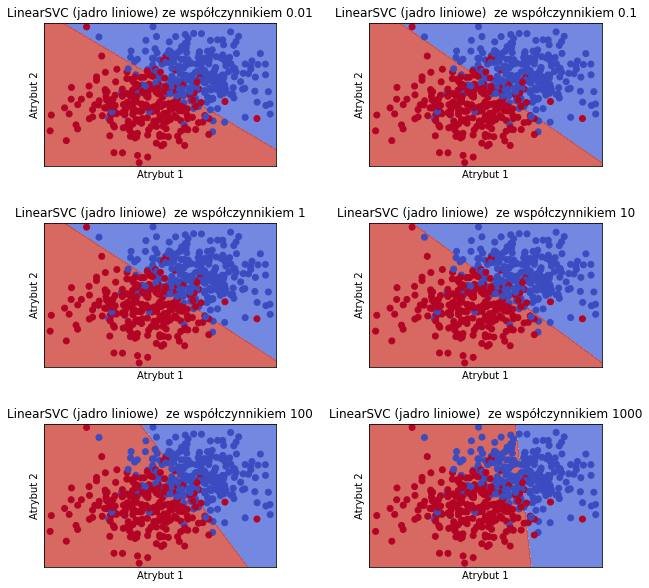

In [13]:
from sklearn import svm
h = .02  # step size in the mesh
cechy = columns


# create a mesh to plot in
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


titles = ['LinearSVC (jadro liniowe) ze współczynnikiem 0.01', 'LinearSVC (jadro liniowe)  ze współczynnikiem 0.1', 'LinearSVC (jadro liniowe)  ze współczynnikiem 1', 'LinearSVC (jadro liniowe)  ze współczynnikiem 10', 'LinearSVC (jadro liniowe)  ze współczynnikiem 100', 'LinearSVC (jadro liniowe)  ze współczynnikiem 1000']

plt.figure(figsize=(10,10))

    
for i in range(6):

    plt.subplot(3, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = lin_svc[i].predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(dane3.iloc[:, 0], dane3.iloc[:, 1], c=dane3.label, cmap=plt.cm.coolwarm)
    plt.xlabel('Atrybut 1')
    plt.ylabel('Atrybut 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    

plt.show()

LinearSVC(C=0.01)
LinearSVC(C=0.1)
LinearSVC(C=1)
LinearSVC(C=10)
LinearSVC(C=100)
LinearSVC(C=1000)


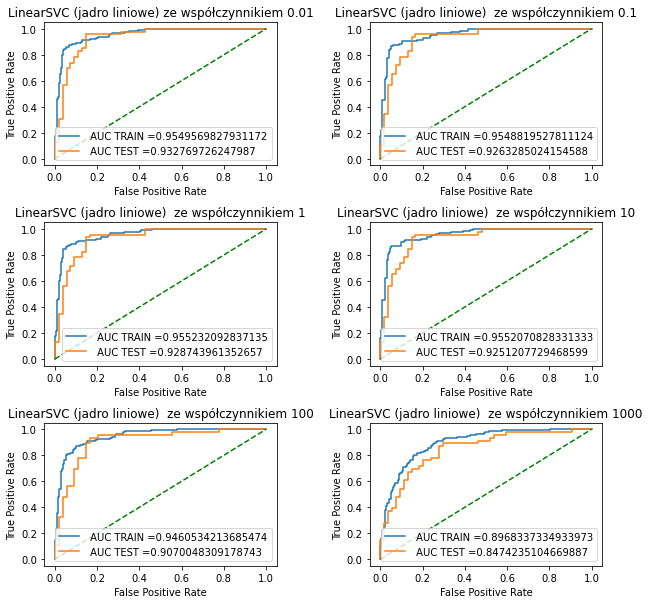

In [15]:
titles = ['LinearSVC (jadro liniowe) ze współczynnikiem 0.01', 'LinearSVC (jadro liniowe)  ze współczynnikiem 0.1', 'LinearSVC (jadro liniowe)  ze współczynnikiem 1', 'LinearSVC (jadro liniowe)  ze współczynnikiem 10', 'LinearSVC (jadro liniowe)  ze współczynnikiem 100', 'LinearSVC (jadro liniowe)  ze współczynnikiem 1000']
plt.figure(figsize=(10,10))
 
for i in range(6):

    y_train_pred =lin_svc[i].decision_function(X_train)    
    y_test_pred =lin_svc[i].decision_function(X_test)

    plt.subplot(3, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    print(lin_svc[i])

    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

    plt.grid()

    plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
    plt.plot([0,1],[0,1],'g--')
    plt.legend()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("AUC(ROC curve)")
    plt.grid(color='black', linestyle='-', linewidth=0.5)
    plt.title(titles[i])
    
    
plt.show()



In [1]:
# najlepszym wyborem byłby współczynnik 0.01, jednak współczynniki 0.1, 1 byłyby też dobrym wyborem
# dla c = 10 widzimy, na wykresie granic decyzyjnych że granica przesunęła się i kilka punktów znalazło się bo złej stronie granicy
# dla c = 100 granica przesuęła się jeszcze bardziej, otrzymaliśmy gorsze wyniki, a dla c =1000 jeszcze więcej
# punktów niebieskich znalazło się po złej stronie granicy, dla c = 1000 otrzymaliśmy najgorsze wyniki,
# co przekłada się również na wykresach krzywych ROC (obserwujemy, że dla c = 100 mamy gorszy wynik niż dla c = 10 
#szczególnie dla danych testowych, a dla c =1000 otrzymujemy najgorsze parametry )

### Zadanie 3

Dla klasyfikatorów SVM z jądrem wielomianowym dokonaj doboru stopnia wielomianu i współczynnika regularyzacji C. Pokaż granice decyzyjne oraz wykreśl krzywe ROC. 

In [22]:
# dokonuję testu dla 4 różnych wartości stopnia wielomianu (1,3,7,11) - dla każdego stopnia testuję 
# różne współczynniki regularyzacji C 

In [23]:
#degree = [1, 3, 7,11]

In [ ]:
# najpierw dla stopnia = 1:

In [25]:
from sklearn import svm

C = [0.01, 0.1, 1, 10, 100, 1000]  # SVM regularization parameter
poly_svc = [0] * 6

for i in range(6):
    parametr = C[i]
    poly_svc[i] = svm.SVC(kernel='poly', degree=1, C=parametr).fit(X_train,  y_train)

print( poly_svc)


[SVC(C=0.01, degree=1, kernel='poly'), SVC(C=0.1, degree=1, kernel='poly'), SVC(C=1, degree=1, kernel='poly'), SVC(C=10, degree=1, kernel='poly'), SVC(C=100, degree=1, kernel='poly'), SVC(C=1000, degree=1, kernel='poly')]


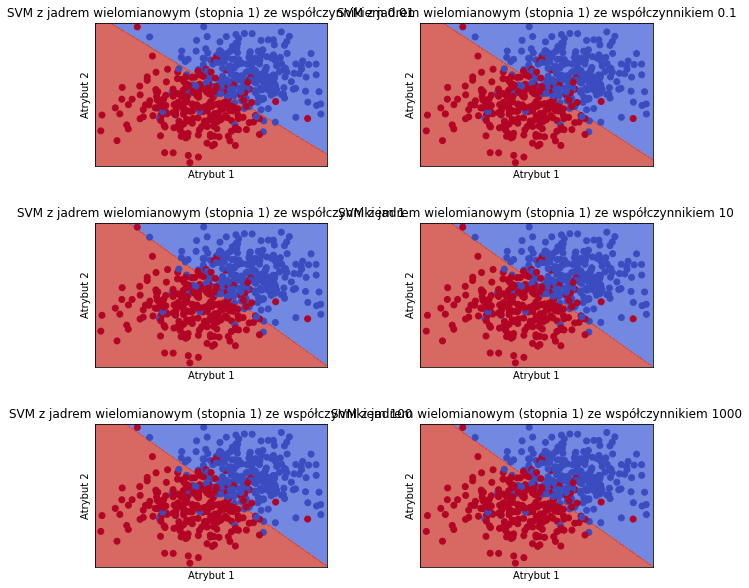

In [26]:
from sklearn import svm
h = .02  # step size in the mesh
cechy = columns


# create a mesh to plot in
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


titles = ['SVM z jadrem wielomianowym (stopnia 1) w. 0.01', 'SVM z jadrem wielomianowym (stopnia 1) w. 0.1','SVM z jadrem wielomianowym (stopnia 1) w. 1','SVM z jadrem wielomianowym (stopnia 1) w. 10','SVM z jadrem wielomianowym (stopnia 1) w. 100','SVM z jadrem wielomianowym (stopnia 1) w. 1000']
plt.figure(figsize=(10,10))

    
for i in range(6):

    plt.subplot(3, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = poly_svc[i].predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(dane3.iloc[:, 0], dane3.iloc[:, 1], c=dane3.label, cmap=plt.cm.coolwarm)
    plt.xlabel('Atrybut 1')
    plt.ylabel('Atrybut 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    

plt.show()

SVC(C=0.01, degree=1, kernel='poly')
SVC(C=0.1, degree=1, kernel='poly')
SVC(C=1, degree=1, kernel='poly')
SVC(C=10, degree=1, kernel='poly')
SVC(C=100, degree=1, kernel='poly')
SVC(C=1000, degree=1, kernel='poly')


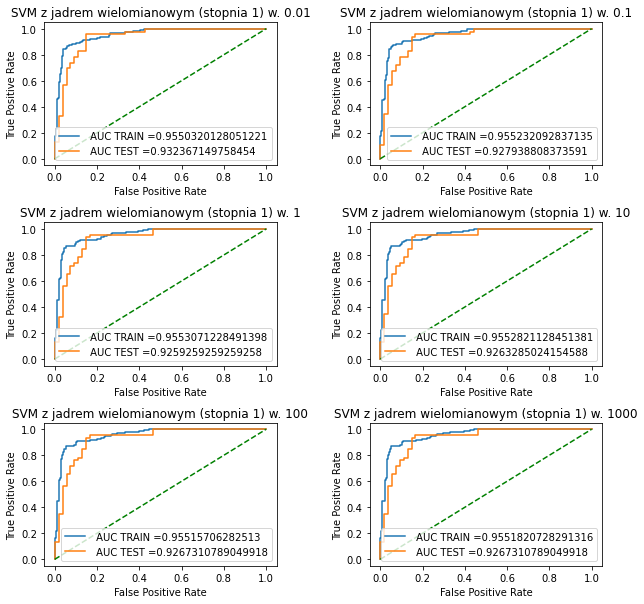

In [28]:
titles = ['SVM z jadrem wielomianowym (stopnia 1) w. 0.01', 'SVM z jadrem wielomianowym (stopnia 1) w. 0.1','SVM z jadrem wielomianowym (stopnia 1) w. 1','SVM z jadrem wielomianowym (stopnia 1) w. 10','SVM z jadrem wielomianowym (stopnia 1) w. 100','SVM z jadrem wielomianowym (stopnia 1) w. 1000']
plt.figure(figsize=(10,10))
 
for i in range(6):

    y_train_pred =poly_svc[i].decision_function(X_train)    
    y_test_pred =poly_svc[i].decision_function(X_test)

    plt.subplot(3, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    print(poly_svc[i])

    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

    plt.grid()

    plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
    plt.plot([0,1],[0,1],'g--')
    plt.legend()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("AUC(ROC curve)")
    plt.grid(color='black', linestyle='-', linewidth=0.5)
    plt.title(titles[i])
    
    
plt.show()

In [ ]:
# dla stopnia równego 1 wyniki jakie otrzymuje dla różnych współczynników c są właściwie jednakowe,
# jeśli mielibyśmy wskazać jeden najlepszy to dla c = 0.01

In [ ]:
#3 

In [40]:
from sklearn import svm

C = [0.01, 0.1, 1, 10, 100, 1000]  # SVM regularization parameter
poly_svc = [0] * 6

for i in range(6):
    parametr = C[i]
    poly_svc[i] = svm.SVC(kernel='poly', degree=3, C=parametr).fit(X_train,  y_train)

print( poly_svc)


[SVC(C=0.01, kernel='poly'), SVC(C=0.1, kernel='poly'), SVC(C=1, kernel='poly'), SVC(C=10, kernel='poly'), SVC(C=100, kernel='poly'), SVC(C=1000, kernel='poly')]


In [41]:
# widzimy, że tutaj nie wyświetla nam się informacja że degree = 3, ponieważ dla tego modelu wartość degree =3
# jest domyślną wartością

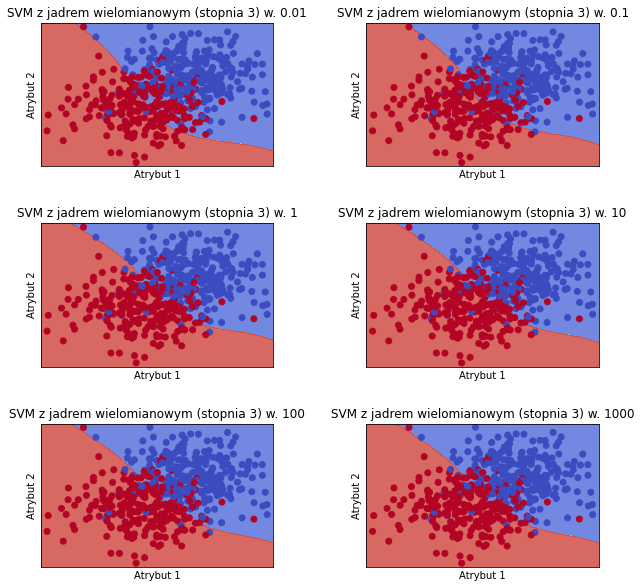

In [30]:
from sklearn import svm
h = .02  # step size in the mesh
cechy = columns


# create a mesh to plot in
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


titles = ['SVM z jadrem wielomianowym (stopnia 3) w. 0.01', 'SVM z jadrem wielomianowym (stopnia 3) w. 0.1','SVM z jadrem wielomianowym (stopnia 3) w. 1','SVM z jadrem wielomianowym (stopnia 3) w. 10','SVM z jadrem wielomianowym (stopnia 3) w. 100','SVM z jadrem wielomianowym (stopnia 3) w. 1000']
plt.figure(figsize=(10,10))

    
for i in range(6):

    plt.subplot(3, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = poly_svc[i].predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(dane3.iloc[:, 0], dane3.iloc[:, 1], c=dane3.label, cmap=plt.cm.coolwarm)
    plt.xlabel('Atrybut 1')
    plt.ylabel('Atrybut 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    

plt.show()

SVC(C=0.01, kernel='poly')
SVC(C=0.1, kernel='poly')
SVC(C=1, kernel='poly')
SVC(C=10, kernel='poly')
SVC(C=100, kernel='poly')
SVC(C=1000, kernel='poly')


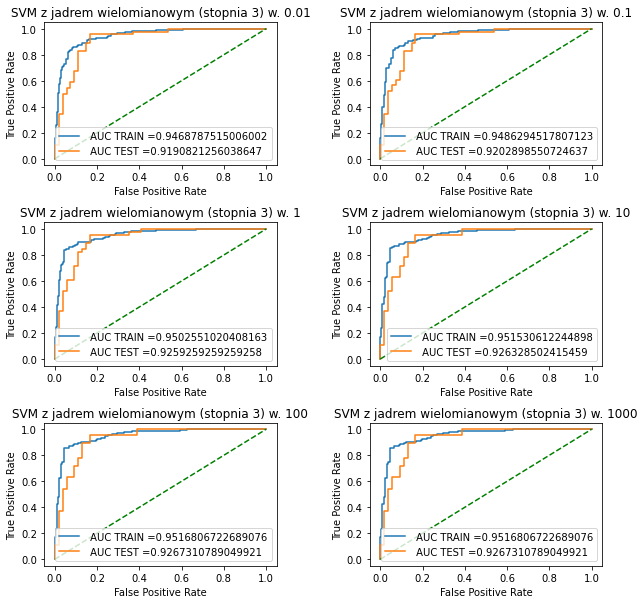

In [31]:
plt.figure(figsize=(10,10))
 
for i in range(6):

    y_train_pred =poly_svc[i].decision_function(X_train)    
    y_test_pred =poly_svc[i].decision_function(X_test)

    plt.subplot(3, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    print(poly_svc[i])

    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

    plt.grid()

    plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
    plt.plot([0,1],[0,1],'g--')
    plt.legend()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("AUC(ROC curve)")
    plt.grid(color='black', linestyle='-', linewidth=0.5)
    plt.title(titles[i])
    
    
plt.show()

In [ ]:
# widzimy, że dla stopnia =3 granica nie jest już linią prostą (co oczywiście wynika ze zmiany stopnia wielomianu z 1 na 3)
# otrzymane przez nas wyniki są zbliżone do tych wcześniejszych
# jak patrzymy na wykresy krzywych ROC nie widizmy dużej zmiany wraz ze wzrostem współczynnika C,
# jednak na wykresie granic decyzyjnych wyraźnie widać, że granica się przesuwa i lepiej dopasowywuje do naszych punktów
# więc dla stopnia = 3 możemy powiedzieć że najlpeszy jest współczynnik 100 i 1000

In [ ]:
# 5

In [32]:
from sklearn import svm

C = [0.01, 0.1, 1, 10, 100, 1000]  # SVM regularization parameter
poly_svc = [0] * 6

for i in range(6):
    parametr = C[i]
    poly_svc[i] = svm.SVC(kernel='poly', degree=5, C=parametr).fit(X_train,  y_train)

print( poly_svc)



[SVC(C=0.01, degree=5, kernel='poly'), SVC(C=0.1, degree=5, kernel='poly'), SVC(C=1, degree=5, kernel='poly'), SVC(C=10, degree=5, kernel='poly'), SVC(C=100, degree=5, kernel='poly'), SVC(C=1000, degree=5, kernel='poly')]


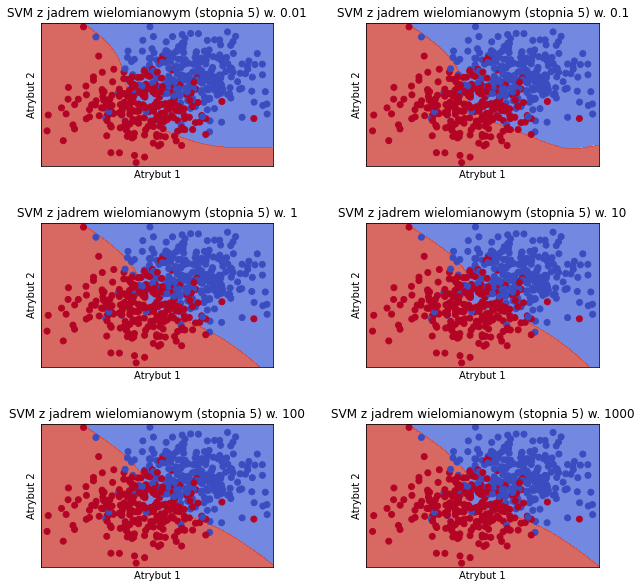

In [33]:
from sklearn import svm
h = .02  # step size in the mesh
cechy = columns


# create a mesh to plot in
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


titles = ['SVM z jadrem wielomianowym (stopnia 5) w. 0.01', 'SVM z jadrem wielomianowym (stopnia 5) w. 0.1','SVM z jadrem wielomianowym (stopnia 5) w. 1','SVM z jadrem wielomianowym (stopnia 5) w. 10','SVM z jadrem wielomianowym (stopnia 5) w. 100','SVM z jadrem wielomianowym (stopnia 5) w. 1000']
plt.figure(figsize=(10,10))

    
for i in range(6):

    plt.subplot(3, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = poly_svc[i].predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(dane3.iloc[:, 0], dane3.iloc[:, 1], c=dane3.label, cmap=plt.cm.coolwarm)
    plt.xlabel('Atrybut 1')
    plt.ylabel('Atrybut 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    

plt.show()

SVC(C=0.01, degree=5, kernel='poly')
SVC(C=0.1, degree=5, kernel='poly')
SVC(C=1, degree=5, kernel='poly')
SVC(C=10, degree=5, kernel='poly')
SVC(C=100, degree=5, kernel='poly')
SVC(C=1000, degree=5, kernel='poly')


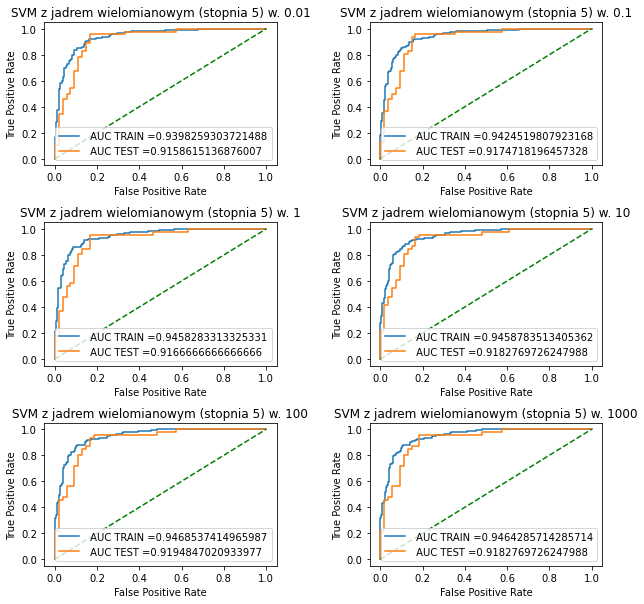

In [34]:
plt.figure(figsize=(10,10))
 
for i in range(6):

    y_train_pred =poly_svc[i].decision_function(X_train)    
    y_test_pred =poly_svc[i].decision_function(X_test)

    plt.subplot(3, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    print(poly_svc[i])

    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

    plt.grid()

    plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
    plt.plot([0,1],[0,1],'g--')
    plt.legend()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("AUC(ROC curve)")
    plt.grid(color='black', linestyle='-', linewidth=0.5)
    plt.title(titles[i])
    
    
plt.show()

In [1]:
# tutaj również na wykresach krzywych ROC ciężko dostrzec różnice między nimi
# jednak na wykresach granic decyzyjnych widzimy dużą różnicę między granicą dla c = 0.01 a c = 10 albo 100 albo 1000
# na podstawie granic możnaby stwierdzić, że dla c = 0.01 o wiele więcej punktów znalazło się po złej stronie granicy
# jednak jak zobaczymy na wyniki krzywych ROC zobaczymy że nie przekłada się to na otrzymane przez nas wyniki

In [ ]:
#7

In [35]:
from sklearn import svm

C = [0.01, 0.1, 1, 10, 100, 1000]  # SVM regularization parameter
poly_svc = [0] * 6

for i in range(6):
    parametr = C[i]
    poly_svc[i] = svm.SVC(kernel='poly', degree=7, C=parametr).fit(X_train,  y_train)

print( poly_svc)



[SVC(C=0.01, degree=7, kernel='poly'), SVC(C=0.1, degree=7, kernel='poly'), SVC(C=1, degree=7, kernel='poly'), SVC(C=10, degree=7, kernel='poly'), SVC(C=100, degree=7, kernel='poly'), SVC(C=1000, degree=7, kernel='poly')]


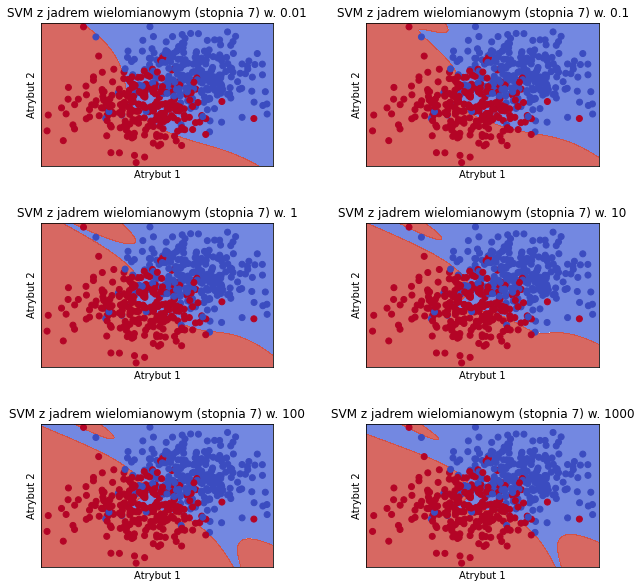

In [36]:
from sklearn import svm
h = .02  # step size in the mesh
cechy = columns


# create a mesh to plot in
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

titles = ['SVM z jadrem wielomianowym (stopnia 7) w. 0.01', 'SVM z jadrem wielomianowym (stopnia 7) w. 0.1','SVM z jadrem wielomianowym (stopnia 7) w. 1','SVM z jadrem wielomianowym (stopnia 7) w. 10','SVM z jadrem wielomianowym (stopnia 7) w. 100','SVM z jadrem wielomianowym (stopnia 7) w. 1000']
plt.figure(figsize=(10,10))

    
for i in range(6):

    plt.subplot(3, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = poly_svc[i].predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(dane3.iloc[:, 0], dane3.iloc[:, 1], c=dane3.label, cmap=plt.cm.coolwarm)
    plt.xlabel('Atrybut 1')
    plt.ylabel('Atrybut 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    

plt.show()

SVC(C=0.01, degree=7, kernel='poly')
SVC(C=0.1, degree=7, kernel='poly')
SVC(C=1, degree=7, kernel='poly')
SVC(C=10, degree=7, kernel='poly')
SVC(C=100, degree=7, kernel='poly')
SVC(C=1000, degree=7, kernel='poly')


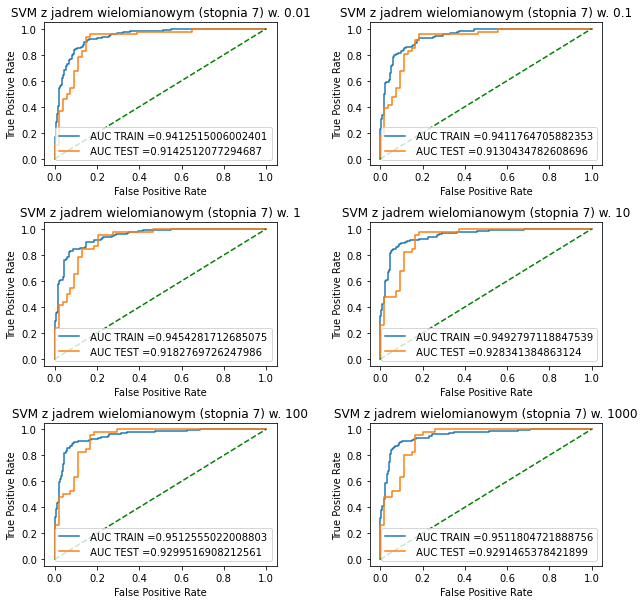

In [37]:
plt.figure(figsize=(10,10))
 
for i in range(6):

    y_train_pred =poly_svc[i].decision_function(X_train)    
    y_test_pred =poly_svc[i].decision_function(X_test)

    plt.subplot(3, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    print(poly_svc[i])

    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

    plt.grid()

    plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
    plt.plot([0,1],[0,1],'g--')
    plt.legend()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("AUC(ROC curve)")
    plt.grid(color='black', linestyle='-', linewidth=0.5)
    plt.title(titles[i])
    
    
plt.show()

In [3]:
# tutaj znów widzimy znaczące różnice na wykresach granic decyzyjnych, 
# jednak na krzywych ROC takich różnic nie można zaobserwować - zmiana granic przekłada się w minimalnym stopniu na zmianę 
#otzrymywanych przez nas wyników na krzywej ROC
# jednak możemy powiedzieć że dla stopnia = 7 najlepsza wartość c to 1000

In [2]:
# podsumowując:
# dla każdego z testowanych przeze mnie stopni wielomianu i wartości współczynnika c otrzymałam bardzo zbliżone wyniki, 
# mimo, że wykresy granic decyzyjnych w niektórych przypadkach znacząco się różniły,
# to wszystkie wykresy krzywych ROC były bardzo do siebie bardzo zbliżone
# mogę napisać że najlepszy wynik dał nam stopień 1 c = 0.001 a także stopień = 3 gdzie c = 100 i 1000
# jednak tak jak pisałam różnice są bardzo małe

### Zadanie 4

Dla klasyfikatorów SVM z jądrem Gaussa dokonaj doboru współczynnika wariancji. Pokaż granice decyzyjne dla kilku wybranych współczynników oraz wykreśl krzywe ROC. 

In [18]:
from sklearn import svm

gamma = [ 0.01, 0.1, 0.7, 2.0, 5.0, 7.0]
rbf_svc = [0] * 6

for i in range(6):
    parametr = gamma[i]
    rbf_svc[i] = svm.SVC(kernel='rbf', gamma=parametr).fit(X_train,  y_train)

print(rbf_svc)

from sklearn import svm


[SVC(gamma=0.01), SVC(gamma=0.1), SVC(gamma=0.7), SVC(gamma=2.0), SVC(gamma=5.0), SVC(gamma=7.0)]


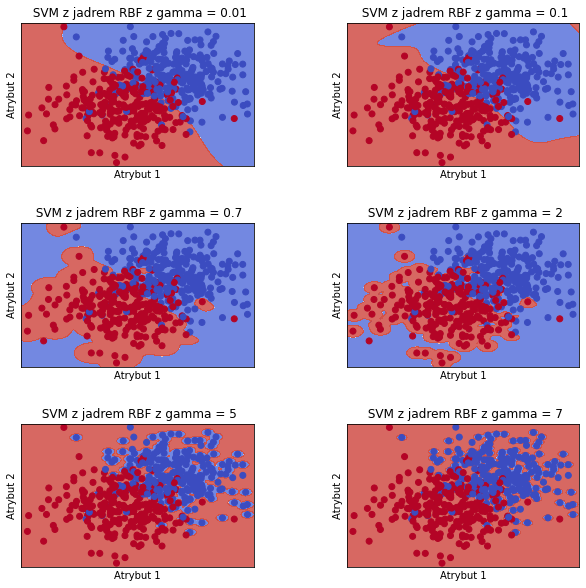

In [19]:
from sklearn import svm
h = .02  # step size in the mesh
cechy = columns


# create a mesh to plot in
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


titles = [' SVM z jadrem RBF z gamma = 0.01', ' SVM z jadrem RBF z gamma = 0.1', ' SVM z jadrem RBF z gamma = 0.7', ' SVM z jadrem RBF z gamma = 2', ' SVM z jadrem RBF z gamma = 5', ' SVM z jadrem RBF z gamma = 7']
plt.figure(figsize=(10,10))

    
for i in range(6):

    plt.subplot(3, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = rbf_svc[i].predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(dane3.iloc[:, 0], dane3.iloc[:, 1], c=dane3.label, cmap=plt.cm.coolwarm)
    plt.xlabel('Atrybut 1')
    plt.ylabel('Atrybut 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    

plt.show()

SVC(gamma=0.01)
SVC(gamma=0.1)
SVC(gamma=0.7)
SVC(gamma=2.0)
SVC(gamma=5.0)
SVC(gamma=7.0)


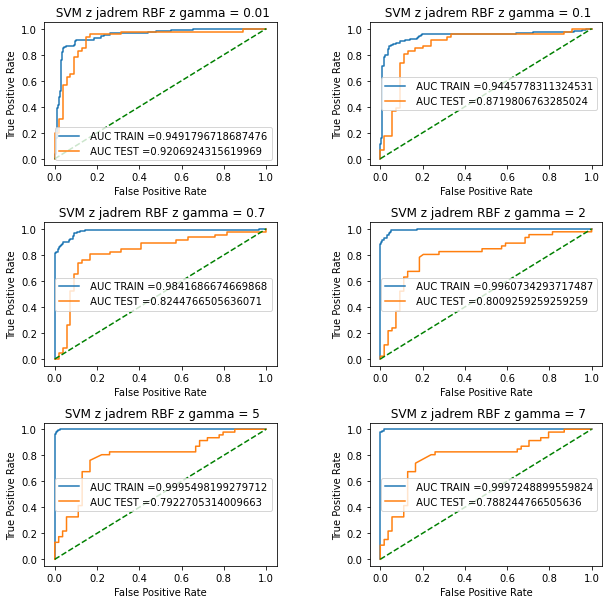

In [20]:
titles = [' SVM z jadrem RBF z gamma = 0.01', ' SVM z jadrem RBF z gamma = 0.1', ' SVM z jadrem RBF z gamma = 0.7', ' SVM z jadrem RBF z gamma = 2', ' SVM z jadrem RBF z gamma = 5', ' SVM z jadrem RBF z gamma = 7']
plt.figure(figsize=(10,10))
 
for i in range(6):

    y_train_pred =rbf_svc[i].decision_function(X_train)    
    y_test_pred =rbf_svc[i].decision_function(X_test)

    plt.subplot(3, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    print(rbf_svc[i])

    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

    plt.grid()

    plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
    plt.plot([0,1],[0,1],'g--')
    plt.legend()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("AUC(ROC curve)")
    plt.grid(color='black', linestyle='-', linewidth=0.5)
    plt.title(titles[i])
    
    
plt.show()




In [4]:
# na wykresach granic decyzyjnych dla c = 10 a w szczególności c = 100 i c =1000 możemy obserować problem przeuczenia,
# kiedy model tak dobrze dopasowywuje się do danych (widzimy na krzywych ROC że dla danych testwoych w tych przypadkach
# AUC wynosi niemalże 1)
# i właśnie z powodu tak dobrego dopasowania do punktów mamy więcej źle przypasowanych punktów treningowych
#(AUC dla treningowych danych maleje)
# obserwujemy tu zjawisko braku generalizacji 
# dla tego modelu najlepszy wynik otrzymujemy dla gamma = 0.01 
# dla naszego modelu im wyższe gamma tym lepsze dopasowanie danych uczących i dostosowanie granic, ale co za tym idzie
# brak generalizacji, dużo danych tesowych znajduje się po złej stronie granicy 

In [42]:
# wykres krzywych ROC można pokazać też w prostszy sposób - za pomocą funkcji plot_roc_curve
# poniżej:

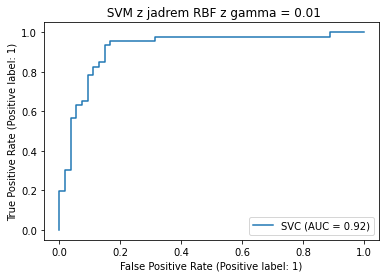

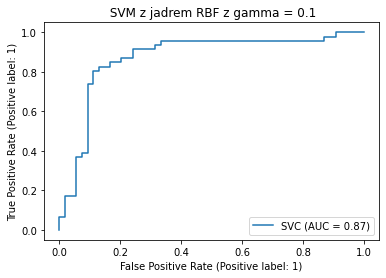

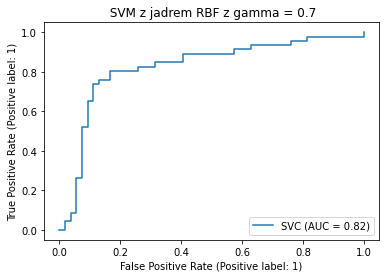

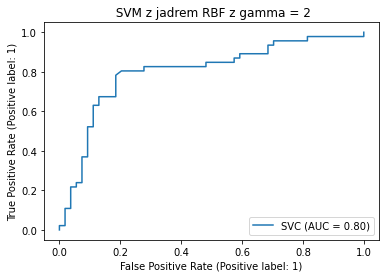

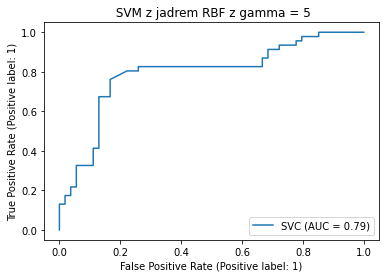

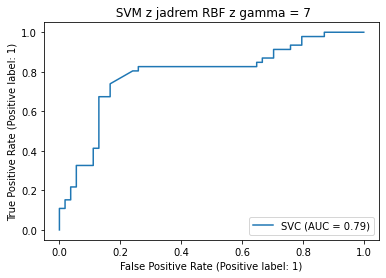

In [21]:
for i in range(6):

    svc_disp = plot_roc_curve(rbf_svc[i], X_test, y_test)
    plt.title(titles[i])

plt.show()
